# JupyterLab Startup Guide

## *Overview*

**OPAL** - *Open Platform for Advanced Learning*

OPAL gives the Air Force the ability to do data analysis with various types of data from flights and other sources.
<br/>
<br/>
A main source of data analyzed by OPAL are **Chapter 10** files which are comprised of data packets.
<br/>
<br/>
*Each packet stores data from a particular source in a data type specific format. Each packet contains a header and a body. The packet header identifies the data source and its type. The body of the packet contains actual flight test data that is collected from the source.*
<br/>
<br/>
Another type of data analyzed includes **ARINC 429** which stands for Aeronautical Radio INC. It is the technical standard for the predominant avionics data bus used on most higher-end commercial and transport aircrafts. It defines the physical and electrical interfaces of a two-wire data bus and a data protocol to support an aircraft's avionics local area network.
<br/>
<br/>
Video data is analyzed as a supplementary source with indicators from the display to formulate data.

*Background knowledge of using the terminal with basic commands is necessary for understanding the next steps.*

## OPAL Workflows

## Workflow 1: MetaFlow (Recommended)

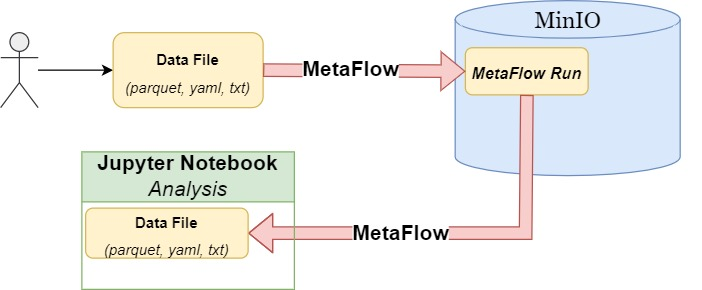

See [Metaflow Startup Guide](../metaflow-startup-guide/metaflow_startup_guide.ipynb) for MetaFlow instructions.

## Workflow 2: Manual File Transfer with S3FS

<img width="400px" height="300px" src="analyst_workflow.png"/>

### 1. Upload arbitrary file type to MinIO  (parquet, csv, text, image)

**S3Fs** is used to upload files to MinIo. More documentation can be found here: https://s3fs.readthedocs.io/_/downloads/en/stable/pdf/

After files have been parsed and translated using **TIP** they are uploaded to **MinIO** using S3Fs
For more information on TIP please view the section further down titled *How to use TIP*

#### Listing files located in a particular MinIO bucket
Here is a code sample that uses S3Fs to upload a file where "my-bucket" is what the path to a MinIO bucket would be.
<br/>
<br/>
`import s3fs
fs = s3fs.S3FileSystem(anon=True)
fs.ls('my-bucket')`

#### Using environment variables when connecting to MinIO with S3FS

`s3 = s3fs.S3FileSystem(key=os.environ["S3_KEY"],`
<br/>
`secret=os.environ["S3_SECRET"],`
<br/>
`token=os.environ["S3_SESSION"],`
<br/>
`client_kwargs=dict(endpoint_url="http://minio:9000"))`
<br/>

`s3.ls(path)`

 

Use TIP to parse and translate
Use S3Fs to upload text, image, parquet and yaml file to MinIo
Use S3Fs to download text, image, parquet and yaml files from MinIo

The goal is bring these files into a data structure so they can be anaylzed

File types:

**Image** needs to be brought in with opencv or numpy array into a data structure
<br/>
**Yaml** is a text file that would be read in as a string then converted into a python dictionary using yaml.load in python.
<br/>
**parquet** is read directly into a pandas data frame. `pandas.read_parquet(path, filesystem=s3fs)`

Snipet example of how to create an s3fs object import s3fs from fs, (pass in minio credentials)
This works with pandas due to the credentials being provided.

### 2. Browse Files within MinIo

Using `s3fs.ls(path to minIO bucket)` will list the files in a MinIo bucket.

Here is a code example of how to list files from MinIO using S3Fs:

`import s3fs`

`s3 = S3FileSystem(anon=False)`
<br/>
`s3.ls('my-bucket/')`

Further resources on using MinIO with S3FS can be found here: https://docs.min.io/minio/baremetal/lifecycle-management/transition-objects-to-s3.htmldocumentation

### 3. Download files from MinIo using S3FS

### 4. Do analysis on data from the file
For more details, see [Viewing parquet file contents in a Jupyter notebook](#viewing_parquet_file_contents_in_a_jupyter_notebook).

## Introduction to Jupyterlab
If you are new to using Jupyterlab you can follow this tutorial https://jupyter.org/try-jupyter/lab/ and also might find the following tips useful.

Here are a few things you can do with Jupyter Notebooks:

**Add a cell:**
Keyboard Shortcut: hit the `esc` key. After that, you can add a cell by hitting the `b` key.
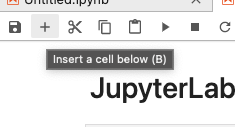

**Delete a cell:**
Keyboard Shortcut: hit the `esc` key. After that, you can delete a cell by hitting the `d` key twice.

**Toggle between Code and Markdown:**
There are multiple ways you can accomplish this. One way is the use the buttons on in the tool bar above:
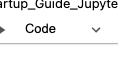
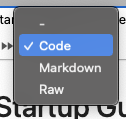
Keyboard Shortcut: hit the `esc` key. After that, you can change a cell to Markdown by hitting the `m` key, or you can change a cell to Code by hitting the `y` key.

**Execute Code:**
You can write python code in a cell and use the ipykernel to execute the code. Make sure the cell type is set to code and a python kernel is being used then hit `ctrl or command or shift` and `enter` keys at the same time to run the code in the cell.

**Minimize sections of a notebook:**
Sections are established in markdown by using the `#` symbol to set subtitles. The more `#` symbols you use will determine how small the subtitle will display. Nesting subtitles will also enable the ability to minimize subsections.
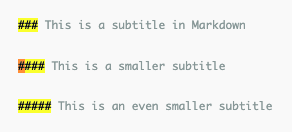
To more easily see which sections will be minimized click the table of contents button on the left sidebar. You can click the blue bar on the side of each section to minimize it. See the screenshot below:
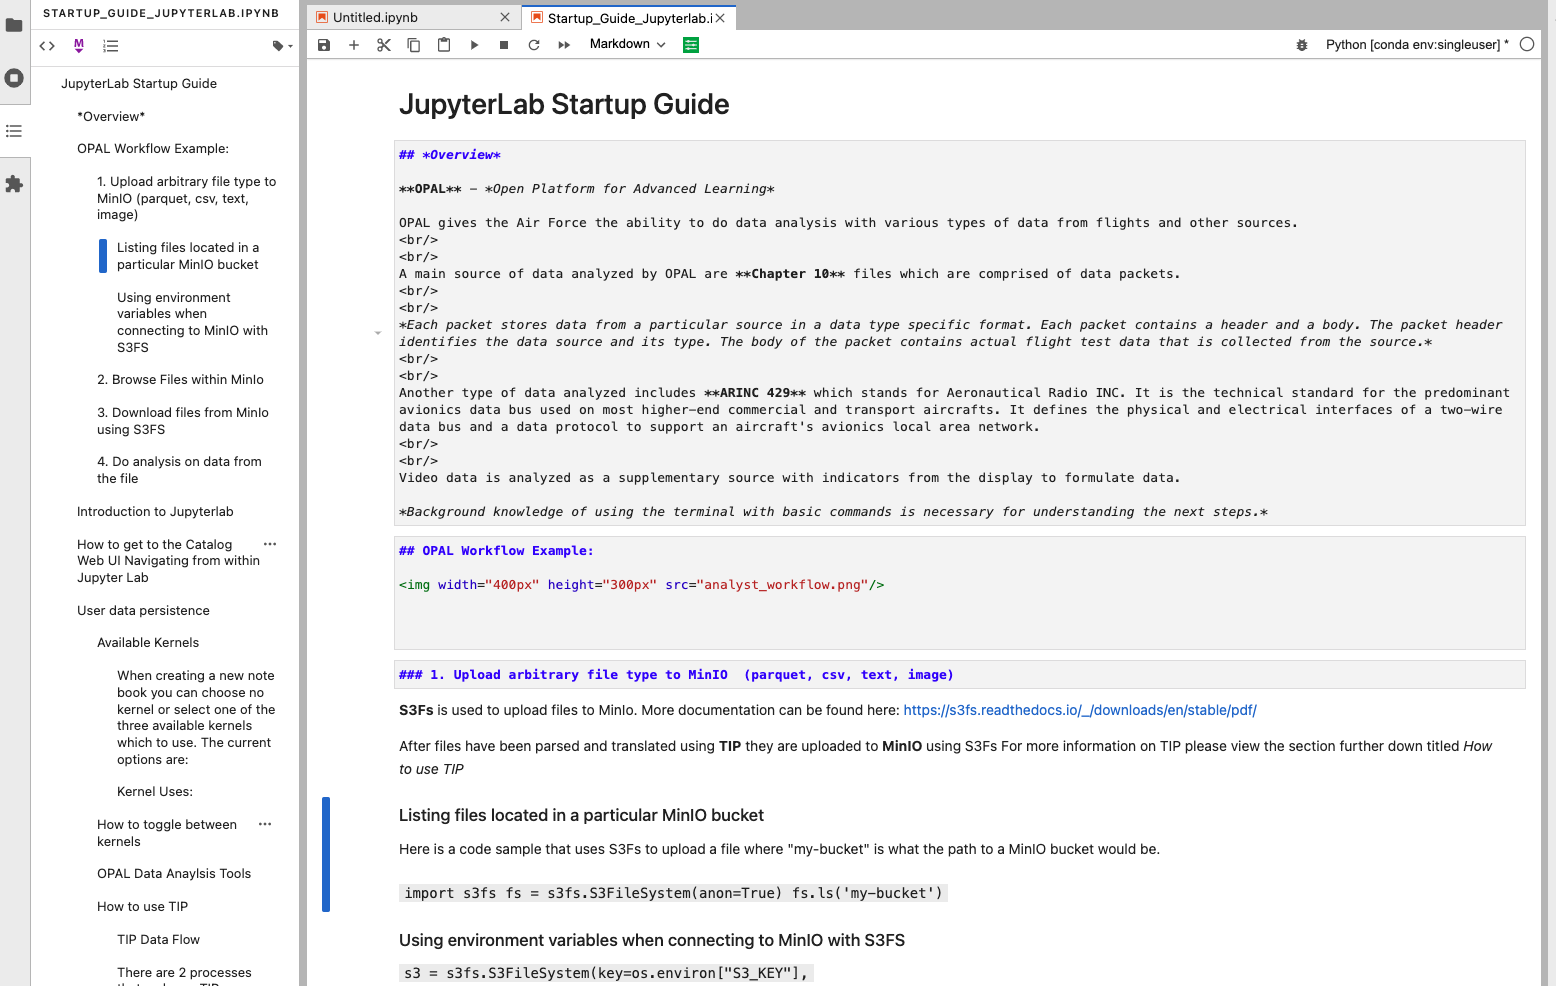

You can click on the blue sidebar to minimize sections or click on the down arrow to minimize sections under a subtitle.
Clicking on the blue sidebar. See below:
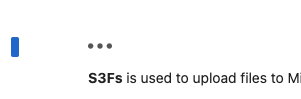
Clicking on the three dots or blue bar again will reopen the minimized cells.

Another way to minimize sections is by clicking on the down arrow. See screen shots below:
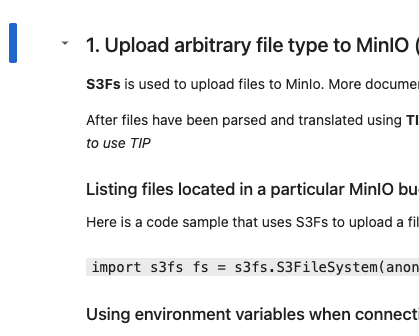
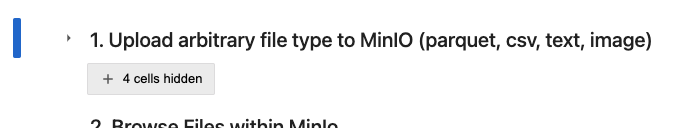

**Running all cells:** 
Go to `File` then select `Run All Cells`. This is useful when you have multiple cells open and you do not want to have to execute them one by one.
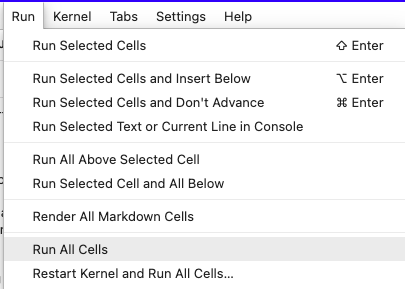

## How to get to the Catalog Web UI Navigating from within Jupyter Lab
  - Open File and select `Hub Control Panel`
  
   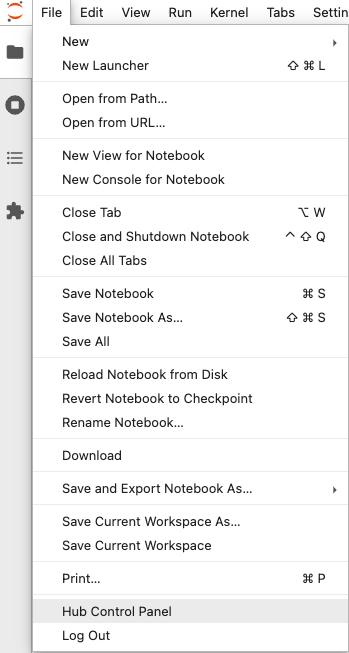
  
  - Open `Services` navigation dropdown and Select `opal-catalog`
  
  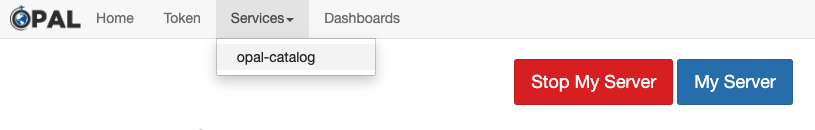

---

## User data persistence

- **Data persistence** involves saving data in a non-volatile storage system so that the data's value can be retrieved reliably later.
- Data is saved in minIO or the Catalog when uploaded.
    - **MinIO** is an object store for all the parsed and/or translated files. It serves OPAL as a storage container with buckets of information that are retrieved for the front end catalog to display and other processes including TIP.
 
- When working within a Jupyter Notebook your work will be saved in your user account in the home directory.


### Available Kernels

>A **kernel** is a runtime environment that provides programming language support for the Jupyter Notebook application.

- #### When creating a new note book you can choose no kernel or select one of the three available kernels which to use. The current options are:

    - Start Preferred Kernel - Python 3 (ipykernel)
    - Use No Kernel - No Kernel
    - Start other Kernel:
      - Python [conda env:single user]*
      - Python [conda env:torch]
    - Use Kernel from Other Session

#### Kernel Uses:

1. **Single User** is used for executing the **TIP** tools.
2. **Torch** is used for machine learning.
3. **Ipykernel** is used as the default kernel for executing Python code.

### How to toggle between kernels

#### 1. Click in the top right corner of your notebook on the kernel that is currently being used:
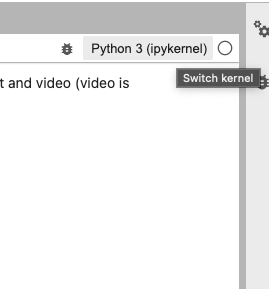

#### 2. Make a selection
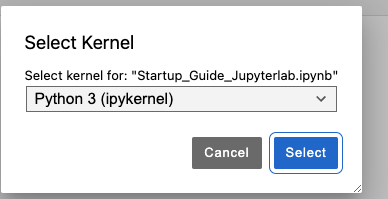
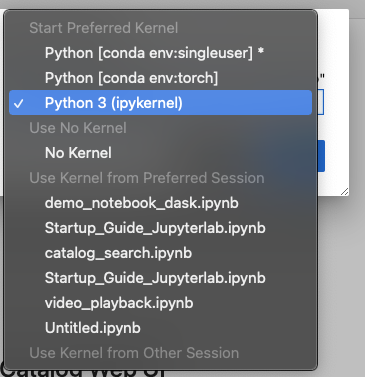

### OPAL  Data Anaylsis Tools
**Torch** is the name of the conda environment for OPAL that includes the following tools:
- **Opencv** provides a real-time optimized Computer Vision library, tools, and hardware.
- **Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python. 
- **Pytorch** is an open source machine learning framework that accelerates the path from research prototyping to production deployment.
- **Pandas** is used to analyze sheets of information. It is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- **SKlearn** is baseline machine learning
- **Tip** uses the **singleuser** kernel. More information and how to use it described in the next section.

### How to use TIP
#### TIP Data Flow
<img width="300px" height="300px" src="tip_data_flow.png"/>



- **TIP** (Translated Ingest Parse): *is used for reading and translating Chapter 10 data. It first takes in the Chapter 10 data and parses it to engineering units then translates it using DTS.*
- **Chapter 10 Data**: are files containing logs from the aircraft.
- **DTS**: are files used to translate Chapter 10 data.

#### There are 2 processes that make up TIP
#### 1. **Parse**: 
##### *`tip parse`*
#### 2. **Translate**: 
##### *`tip_translate_1553`* or *`tip_translate_arinc_429`*

#### *Each of these processes have command line interface help guides displaying options and hints on how to use them:*
- *`tip parse -h`*
- *`tip_translate_1553 -h`*
- *`tip_translate_arinc -h`*

- TIP is run using the single user kernel.
- The best way is to use the command line tools for running TIP. It is possible to run it in a notebook with the ! in front of the commands. `!tip parse`...
- Select the `+ button` to add a new notebook then select `Terminal`


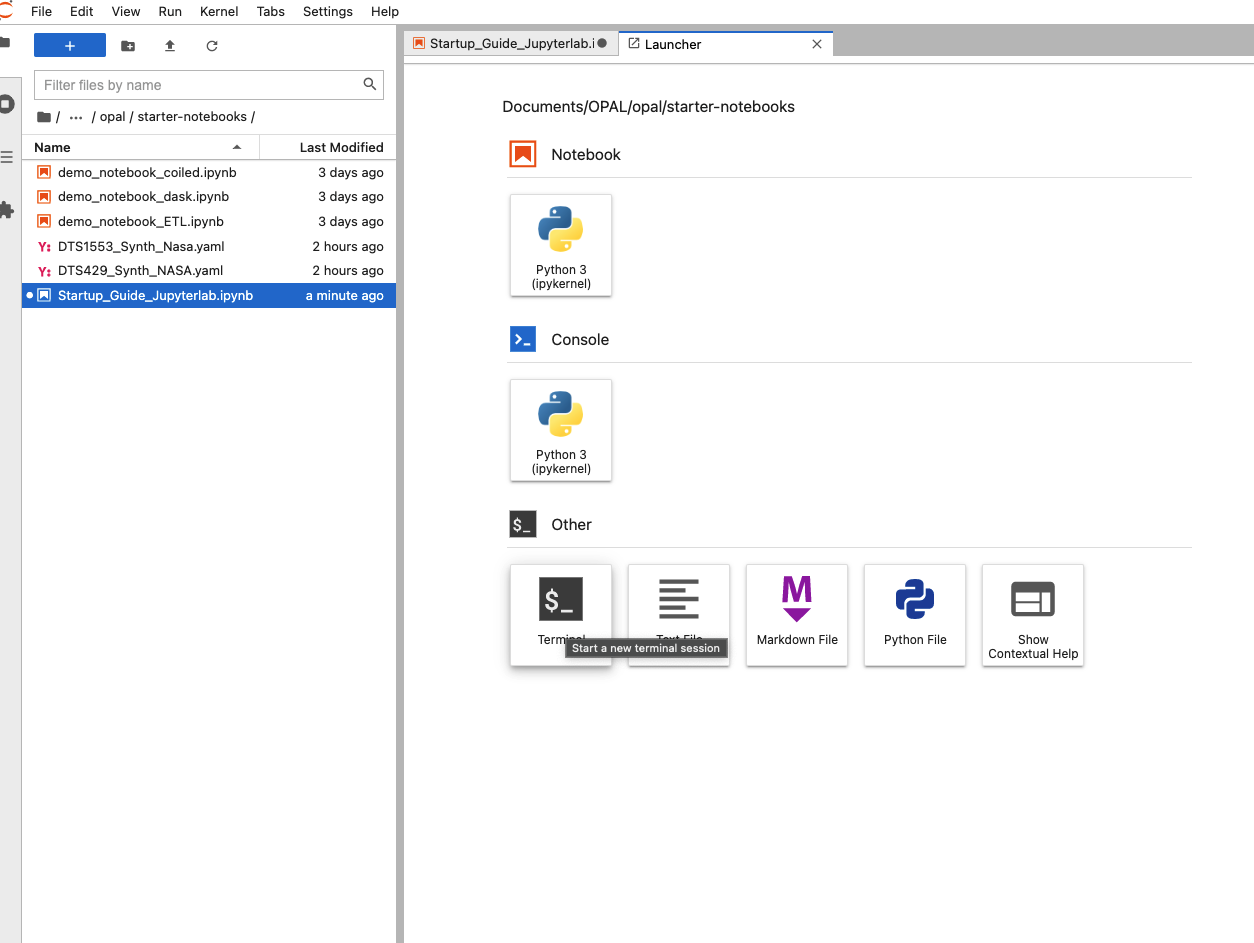

#### Parsing Chapter 10 Files
> - Locate and use the path to a Chapter 10 Data file as an arguement for `tip_parse`
> - Change the directory to the the Chapter 10 file `cd /opal/starter-notebooks/startup-guide`

Running `tip_parse /home/jovyan/opal/resources/652200104150842.ch10` will output below:

Copy and paste the code above in the terminal then hit enter. See example below:

#### Here is what it looks like in a jupyter notebook using the [conda env:singleuser] kernel:

In [1]:
!tip parse /home/jovyan/opal/resources/652200104150842.ch10

[23:04:56 I] tip_parse version: d3ddd56e
[23:04:56 I] Ch10 file path: /home/jovyan/opal/resources/652200104150842.ch10
[23:04:56 I] Output path: /home/jovyan/opal/resources
[23:04:56 I] Log directory: /home/jovyan/opal/resources
[23:04:56 I] Ch10 file size: 1.024780 MB
[23:04:56 I] AllocateResources: chunk size 200000000 bytes
[23:04:56 I] AllocateResources: using 1 threads
[23:04:56 I] AllocateResources: creating 1 workers
[23:04:56 I] TMATS output path: /home/jovyan/opal/resources/652200104150842_COMPUTER_GENERATED_DATA_F1.txt
[23:04:56 I] Time data output path: /home/jovyan/opal/resources/652200104150842_TIME_DATA_F1.parquet
[23:04:56 I] CreateCh10PacketOutputDirs: Create MILSTD1553_F1 output dir: /home/jovyan/opal/resources/652200104150842_MILSTD1553_F1.parquet
[23:04:56 I] CreateCh10PacketOutputDirs: Create ARINC429_F0 output dir: /home/jovyan/opal/resources/652200104150842_ARINC429_F0.parquet
[23:04:56 I] CreateCh10PacketOutputDirs: Create VIDEO_DATA_F0 output dir: /home/jovyan/o

There is 1 text and 3 parquet directories outputted from parsing the Chapter 10 which include:
- *652200101121118_ARINC429_F0.parquet* - directory
- *652200101121118_COMPUTER_GENERATED_DATA_F1.text* - File
- *652200101121118_MILSTD1553_F1.parquet*
- *652200101121118_TIME_DATA_F1.parquet*

#### Parquet Files
> Apache Parquet is an open source, column-oriented data file format designed for efficient data storage and retrieval. It provides efficient data compression and encoding schemes with enhanced performance to handle complex data in bulk. Apache Parquet is designed to be a common interchange format for both batch and interactive workloads.

##### Each parquet directory contains 2 files: 
 - 000.parquet
 - _metatdata.yaml

In [2]:
!cd /home/jovyan/opal/resources/652200104150842_ARINC429_F0.parquet; ls

000.parquet  _metadata.yaml


#### _metadata.yaml

##### *Contains information about the parsing job on the Chapter 10 Data File. See contents below:*

In [3]:
!cd /home/jovyan/opal/resources/652200104150842_ARINC429_F0.parquet; cat _metadata.yaml

---
type: parsed_ARINC429_F0
uid: be00ab657aeb2499cd99f7a0a9e211c669355bab1baf02c67d37530638207784
provenance:
  time: 2022-12-15 23:04:56
  version: d3ddd56e
  resource:
    - type: CH10
      path: /home/jovyan/opal/resources/652200104150842.ch10
      uid: 29b43ef8fe61d0077138f04b2570f6bc311255aa90ac6caedb07827ec2704c7c
config:
  ch10_packet_type:
    ARINC429_F0: true
    ETHERNET_DATA_F0: true
    MILSTD1553_F1: true
    VIDEO_DATA_F0: true
  parse_chunk_bytes: 200
  parse_thread_count: 1
  max_chunk_read_count: 1000
  worker_offset_wait_ms: 200
  worker_shift_wait_ms: 200
  stdout_log_level: info
runtime:
  chanid_to_labels:
    40: [36, 68, 100, 132, 164, 196, 228]
    41: [36, 68, 100, 132, 164, 196, 228]
  chanid_to_bus_numbers:
    40: [0]
    41: [0]
  chanid_to_bus_numbers_to_labels:
    40: {0: [36, 68, 100, 132, 164, 196, 228]}
    41: {0: [36, 68, 100, 132, 164, 196, 228]}
  tmats_chanid_to_429_format:
    40: 0
    41: 0
  tmats_chanid_to_429_subchans:
    40: [1]
    4

<a id=’#viewing_parquet_file_contents_in_a_jupyter_notebook’></a>
#### Viewing parquet file contents in a Jupyter notebook

To view the contents of a parquet file in a jupyter notebook you will need to use **Pandas** and **Python**. This is necessary because simply using `cat` to print the file in the terminal will yeild nonsense.

**Pandas** is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.

In [4]:
import pandas as pd
parquet_file = r'/home/jovyan/opal/resources/652200104150842_ARINC429_F0.parquet';
pd.read_parquet(parquet_file, engine='auto')

,time,doy,channelid,gaptime,BS,PE,FE,bus,label,SDI,data,SSM,parity
0,987324068050000000,False,40,0,False,False,False,0,41,0,0,3,True
1,987324068050100000,False,40,1000,False,False,False,0,42,0,0,3,True
2,987324068050200000,False,40,1000,False,False,False,0,43,0,1,3,True
3,987324068050300000,False,40,1000,False,False,False,0,44,0,0,3,True
4,987324068050400000,False,40,1000,False,False,False,0,45,0,37632,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,987324128000200000,False,41,1000,False,False,False,0,43,0,1,3,True
16796,987324128000300000,False,41,1000,False,False,False,0,44,0,0,3,True
16797,987324128000400000,False,41,1000,False,False,False,0,45,0,28928,3,False
16798,987324128000500000,False,41,1000,False,False,False,0,46,0,86016,3,True


#### TIP - Translation Stage with DTS

**DTS** (Data Translation Specification): a file type created by OPAL to be used instead of an ICD

*Input for the translate stage of TIP is a **DTS** which is a TIP specific yaml format.*

See help documentation to view available flags for the translation stage with `tip_translate_1553 -h`

*A few example DTS files are located in `/opal/starter-notebooks/starter-guide`*
- DTS1553_Syynth_Nasa.yaml
- DTS429_Synth_NASA.yaml

#### See help with `tip_translate_1553 -h` to know which flags to use for running the Translate process of TIP

In [5]:
!tip_translate_1553 -h

Usage: tip_translate_1553 <positional arguments> [options / flags]
       tip_translate_1553 [--help | -h]
       tip_translate_1553 [--version | -v]
       tip_translate_1553 [--dts_help]
       tip_translate_1553 INPUT_DATA INPUT_DTS [--output_path | -o <value>]
                          [--log_path | -l <value>]
                          [--thread_count | -t <value>]
                          [--tmats_busname_corrections | -T <value>]
                          [--vote_threshold | -V <value>]
                          [--busname_exclusion | -b <value>]
                          [--select_msg | -m <value>]
                          [--log_level | -L <value>] [--tmats]
                          [--prompt_user | -p] [--stop_after_busmap | -s]
                          [--check_tmats] [--disable_sys_limits]
                          [--disable_dts_validation]

Translate parsed 1553 data in Parquet format to engineering units, grouped into
message-specific Parquet tables.

--help, -h     

## More about OPAL

#### OPAL is deployed using Docker Compose which consists of 9 images

##### Software Stack:

1. **Traefik** - reverse proxy
2. **Jupyterhub** - manages and spawns single user Jupyterlab instances
3. **Single** user TIP image - Single user Jupyter image with TIP in it with various data analysis tools
4. **Minio** - Utilized as an object storage (Like AWS S3)
5. **Opal Catalog Front End** - Display graphical interface to query and view parsed translated Chapter 10 data
6. **Opal Catalog Back End** - Used Tornado and connected to Jupyterhub
7. **Postgresql** - Database for the Catalog
8. **Keycloak** - User authentication
9. **Iron Bank Pytorch** - Contains additional analytics tools (ML Learning Environment) that are added during deployment time

##### Links to Docker Images:

**SINGLE_USER_TIP_IMAGE**=
<a href="registry.il2.dso.mil/skicamp/project-opal/tip:ef706336">
    registry.il2.dso.mil/skicamp/project-opal/tip:ef706336
</a>
<br/>
**OPALCATALOG_FE_IMAGE**=
<a href="registry.il2.dso.mil/skicamp/project-opal/opal-catalog-fe:4b5748b9">
    registry.il2.dso.mil/skicamp/project-opal/opal-catalog-fe:4b5748b9
</a>
<br/>
**OPALCATALOG_BE_IMAGE**=
<a href="registry.il2.dso.mil/skicamp/project-opal/opal-catalog-be:354ccafb">
    registry.il2.dso.mil/skicamp/project-opal/opal-catalog-be:354ccafb
</a>
<br/>
**POSTGRESQL_IMAGE**=
<a href="registry1.dso.mil/ironbank/opensource/postgres/postgresql12:12.9">
    registry1.dso.mil/ironbank/opensource/postgres/postgresql12:12.9
</a>
<br/>
**MINIO_IMAGE**=
<a href="registry1.dso.mil/ironbank/opensource/minio/minio:RELEASE.2022-01-28T02-28-16Z">
    registry1.dso.mil/ironbank/opensource/minio/minio:RELEASE.2022-01-28T02-28-16Z
</a>
<br/>
**JUPYTERHUB_IMAGE**=
<a href="registry1.dso.mil/ironbank/opensource/metrostar/jupyterhub:2.1.1_v3">
    registry1.dso.mil/ironbank/opensource/metrostar/jupyterhub:2.1.1_v3
</a>
<br/>
**KEYCLOAK_IMAGE**=
<a href="registry1.dso.mil/ironbank/opensource/keycloak/keycloak:16.1.1">
    registry1.dso.mil/ironbank/opensource/keycloak/keycloak:16.1.1
</a>
<br/>
**IB_PYTORCH_IMAGE**=
<a href="registry1.dso.mil/ironbank/opensource/metrostar/pytorch:1.11.0">
    registry1.dso.mil/ironbank/opensource/metrostar/pytorch:1.11.0
</a>